## Monte Carlo Simulation
- https://en.wikipedia.org/wiki/Monte_Carlo_method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
tickers = ["FB", "IBM", "AMZN", "AAPL"]

df_list = []
for ticker in tickers:
    df = pd.read_csv("ticker-" + ticker.lower() + ".csv", index_col=0, parse_dates=True)
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)
data.columns = tickers

In [4]:
log_returns = np.log(data/data.shift())

In [17]:
weight = np.random.random(4)
weight /= np.sum(weight)

In [19]:
exp_return = np.sum(log_returns.mean()*weight)*252

In [21]:
exp_volatility = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))

In [22]:
sharpe_ratio = exp_return / exp_volatility

In [23]:
sharpe_ratio

0.874792309603606

In [25]:
# Monte Carlo Simulation
n = 5000

weights = np.zeros((n, 4))
exp_returns = np.zeros(n)
exp_volatilities = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= np.sum(weight)
    weights[i] = weight
    
    exp_returns[i] = np.sum(log_returns.mean()*weight)*252
    exp_volatilities[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_returns[i] / exp_volatilities[i]

In [26]:
sharpe_ratios.max()

1.1446952757127604

In [27]:
sharpe_ratios.argmax()

3448

In [28]:
weights[3448]

array([0.0347139 , 0.00521349, 0.43352921, 0.5265434 ])

<IPython.core.display.Javascript object>


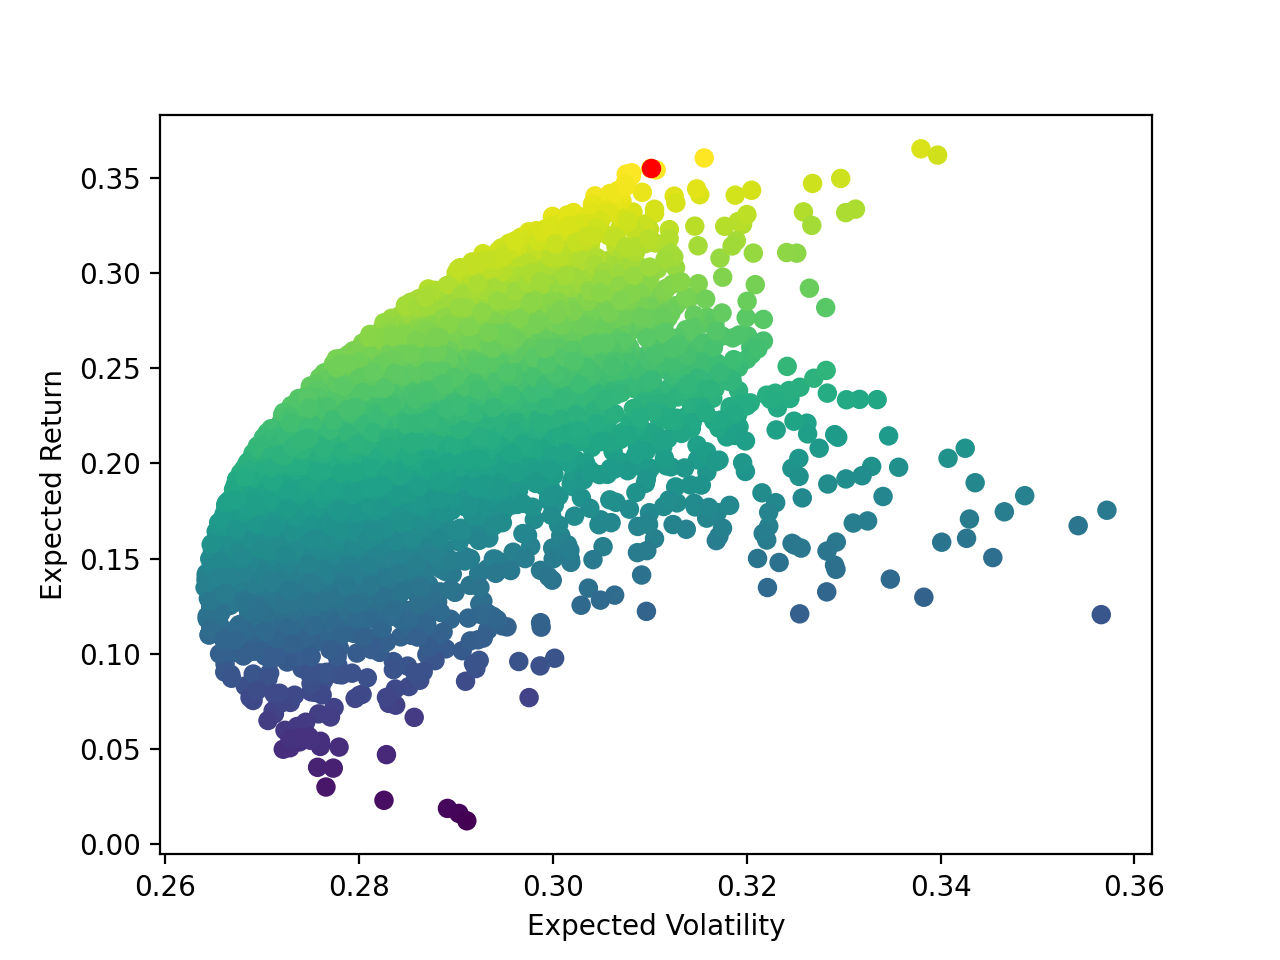

Text(0, 0.5, 'Expected Return')

In [31]:
fig, ax = plt.subplots()
ax.scatter(exp_volatilities, exp_returns, c=sharpe_ratios)
ax.scatter(exp_volatilities[sharpe_ratios.argmax()], exp_returns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel("Expected Volatility")
ax.set_ylabel("Expected Return")